In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline


In [2]:
#Composition
comp = {'element':['CO2','N2','C1','C2','C3','i-C4','n-C4'],
        'yi':[0.02,0.01,0.85,0.04,0.03,0.03,0.02],
        'Tci(R)':[547.91,227.49,343.33,549.92,666.06,734.46,765.62],
        'Pci(psi)':[1071,493.1,666.4,706.5,616.4,527.9,550.6]}

df = pd.DataFrame(comp)

df

,element,yi,Tci(R),Pci(psi)
0,CO2,0.02,547.91,1071.0
1,N2,0.01,227.49,493.1
2,C1,0.85,343.33,666.4
3,C2,0.04,549.92,706.5
4,C3,0.03,666.06,616.4
5,i-C4,0.03,734.46,527.9
6,n-C4,0.02,765.62,550.6


In [3]:
df['yi*Tci'] = df['yi']*df['Tci(R)']

df['yi*Pci'] = df['yi']*df['Pci(psi)']

In [4]:
#Pseudo Critical Temperature
Tpc = df['yi*Tci'].sum()

#Pseudo Critical Pressure
Ppc = df['yi*Pci'].sum()

print(Tpc,Ppc)

384.3884 666.3919999999998


In [5]:
#Reservoir Properties
P = 3000  #Reservoir Pressure

T = 180 + 460 #deg Rankine

In [6]:
#Pseudo Reduced Properties
Ppr = P/Ppc

Tpr = T/Tpc

In [7]:
gas = df[['element','yi']]

gas['Mi'] = np.array([44,28,16,30,44,58,58])

<ipython-input-7-6ae76108863c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas['Mi'] = np.array([44,28,16,30,44,58,58])


In [8]:
gas['yi*Mi'] = gas['yi']*gas['Mi']

Mav = gas['yi*Mi'].sum()

<ipython-input-8-4d77126ef3b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas['yi*Mi'] = gas['yi']*gas['Mi']


In [9]:
Mav

20.179999999999996

In [10]:
vg = Mav/28.97

In [11]:
vg

0.6965826717293752

In [12]:
T_pc = 168 + 325*vg -12.5*(vg**2)

# T_pc

P_pc = 677 + 15*vg - 37.5*(vg**2)

print(T_pc,P_pc)


388.3240255801265 669.2527118801793


In [13]:
T_pr = T/T_pc

P_pr = P/P_pc


In [14]:
def z_calculator(T_pr,P_pr):
  A = 1.39 * ((T_pr - 0.92) ** 0.5) - (0.36*T_pr) - 0.10
  E = 9*(T_pr - 1)
  B = (0.62 - 0.23*T_pr)*P_pr + ((0.066 / (T_pr - 0.86)) - 0.037)*(P_pr**2) + (0.32*(P_pr**2)) / (10*E)
  C = 0.132 - 0.32 * math.log(T_pr)
  F = 0.3106 - 0.49*T_pr + 0.1824*(T_pr**2)
  D = 10 ** F

  z = A + ((1 - A) / math.exp(B)) + (C * (P_pr ** D))

  return z


In [ ]:
z = z_calculator(T_pr,P_pr)

In [17]:
p = np.linspace(1000,5000,50)

ppr = p/P_pc

tpr = [1.05,1.1,1.15,1.2,1.25,1.3]


z_o = []

for t in tpr:
  z_in = []
  for pr in ppr:

    res = z_calculator(t,pr)

    z_in.append(res)
  
  z_o.append(z_in)

In [18]:
z_df = pd.DataFrame(z_o)

In [19]:
z_df = z_df.T

In [20]:
z_df.columns = ['T_pr(1.05)','T_pr(1.10)','T_pr(1.15)','T_pr(1.20)','T_pr(1.25)','T_pr(1.30)']

z_df.index = p/P_pc
z_df

,T_pr(1.05),T_pr(1.10),T_pr(1.15),T_pr(1.20),T_pr(1.25),T_pr(1.30)
1.494204,0.433389,0.528676,0.590395,0.634488,0.667388,0.692586
1.616180,0.406309,0.501493,0.564451,0.609952,0.644160,0.670495
1.738156,0.384548,0.477999,0.541198,0.587445,0.622498,0.649637
1.860131,0.367867,0.458193,0.520704,0.567052,0.602490,0.630092
1.982107,0.355914,0.441991,0.502980,0.548820,0.584192,0.611920
2.104083,0.348263,0.429240,0.487983,0.532756,0.567635,0.595158
2.226059,0.344447,0.419735,0.475630,0.518838,0.552825,0.579828
2.348035,0.343983,0.413234,0.465802,0.507010,0.539745,0.565933
2.470010,0.346394,0.409470,0.458352,0.497198,0.528359,0.553459
2.591986,0.351230,0.408165,0.453114,0.489304,0.518613,0.542382


<Figure size 576x288 with 0 Axes>

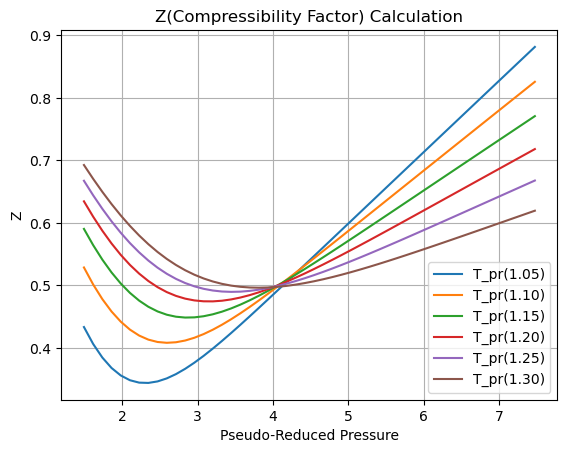

In [21]:
plt.figure(figsize=(8,4))
plt.style.use('default')


z_df.plot()


plt.title('Z(Compressibility Factor) Calculation')

plt.xlabel('Pseudo-Reduced Pressure')

plt.ylabel('Z')


plt.legend(loc='best')

plt.grid()
